# Predicting Heart Disease Using Machine Learning

Using a Machine Learning Model to determine whether or not you can predict if someone has a Heart Disease based on their medical attributes.

## 1. Problem Definition

> Given clinical parameters about a patient, can we determine whether or not they have Heart Disease?

## 2. Data

Dataset can be found on Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci/data

## 3. Features

This given dataset provides 14 of the 76 attributes found in the larger Cleveland dataset. 

* age
* sex:
    * 0: Female
    * 1: Male
* cp: chest pain type (4 values)
* trestbps: resting blood pressure
* chol: serum cholestoral in mg/dl
* fbs: fasting blood sugar > 120 mg/dl
* restecg: resting electrocardiographic results (values 0,1,2)
* thalach: maximum heart rate achieved
* exang: exercise induced angina
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 
    * 3 = normal 
    * 6 = fixed defect 
    * 7 = reversable defect
* target:
    * 0: No Heart Disease
    * 1: Heart Disease

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style = 'whitegrid', font_scale = 1.2)

In [2]:
heart_disease = pd.read_csv('heart-disease.csv')

In [3]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

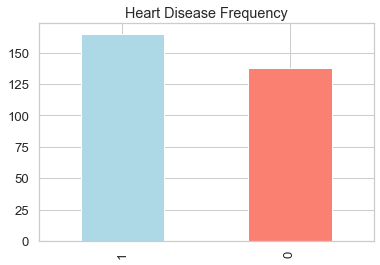

In [7]:
#sns.countplot('target', data = heart_disease);
heart_disease['target'].value_counts().plot(kind = 'bar', color = ['lightblue', 'salmon']) 
plt.title('Heart Disease Frequency');

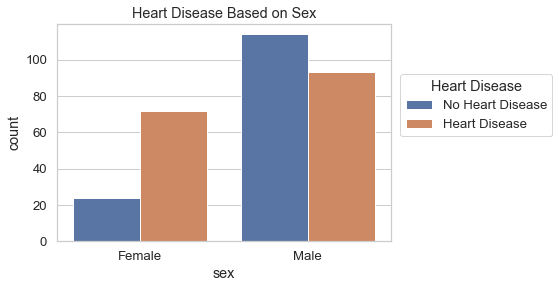

In [8]:
g = sns.countplot('sex', hue = 'target', data = heart_disease)
g.set(xticklabels = ['Female', 'Male'])
plt.title('Heart Disease Based on Sex')
plt.legend(title = 'Heart Disease', labels = ['No Heart Disease', 'Heart Disease'], bbox_to_anchor = (1.5,0.8));

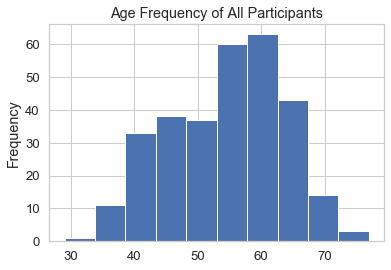

In [9]:
heart_disease['age'].plot.hist(ec = 'white', title = 'Age Frequency of All Participants');

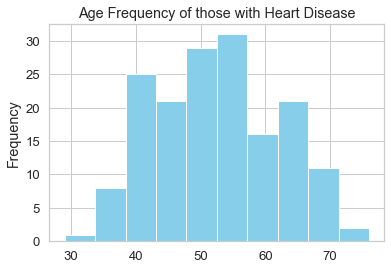

In [10]:
heart_disease['age'][heart_disease['target'] == 1].plot.hist(ec = 'white', color = 'skyblue', )
plt.title('Age Frequency of those with Heart Disease');

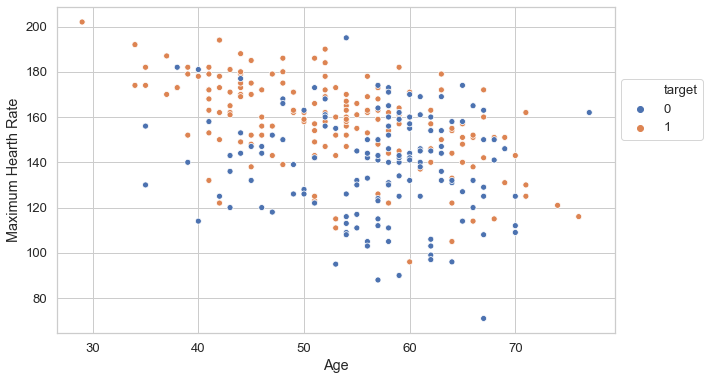

In [11]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'age', y = 'thalach', hue = 'target', data = heart_disease)
plt.ylabel('Maximum Hearth Rate')
plt.xlabel('Age')
plt.legend(bbox_to_anchor = (1,0.8));

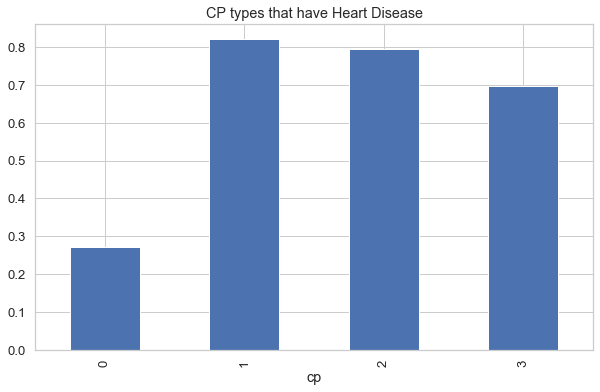

In [12]:
heart_disease[['cp', 'target']].groupby(['cp']).mean().plot(kind = 'bar', figsize = (10,6), legend = False)
plt.title('CP types that have Heart Disease');
#plt.plot()

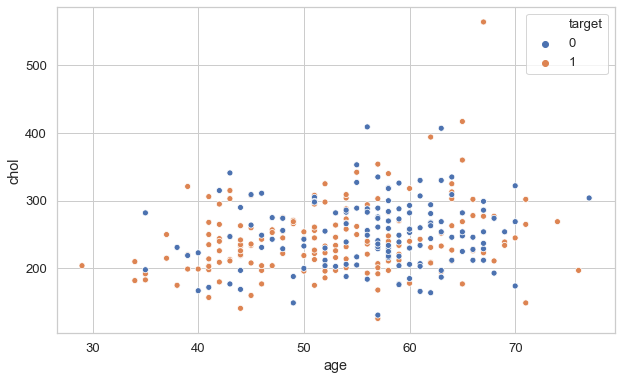

In [13]:
plt.figure(figsize= (10,6))
sns.scatterplot(x = 'age', y = 'chol', hue = 'target', data = heart_disease);

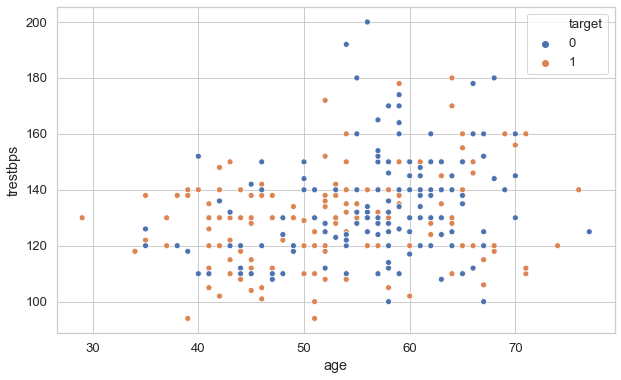

In [14]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'age', y = 'trestbps', hue = 'target', data = heart_disease);

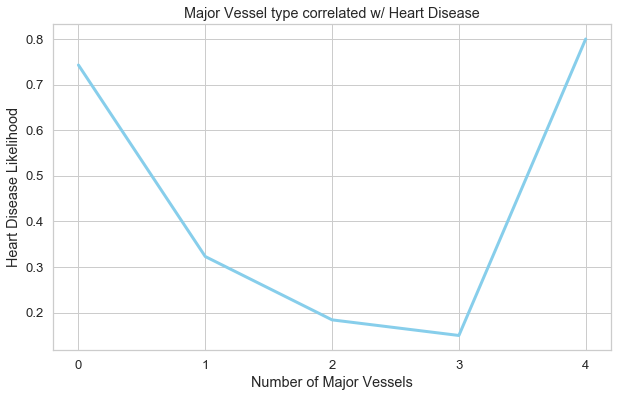

In [15]:
heart_disease[['ca', 'target']].groupby(['ca']).mean().plot(figsize = (10,6), legend = False, color = 'skyblue', lw = 3,
                                                            title = 'Major Vessel type correlated w/ Heart Disease')
plt.ylabel('Heart Disease Likelihood')
plt.xlabel('Number of Major Vessels')
plt.xticks([0,1,2,3,4]);

From a brief overview, it appears that CP and CA play a major role in determining whether or not someone has Heart Disease. Lets explore all the correlations in one table.

### Finding which features have the greater correlation with the target label

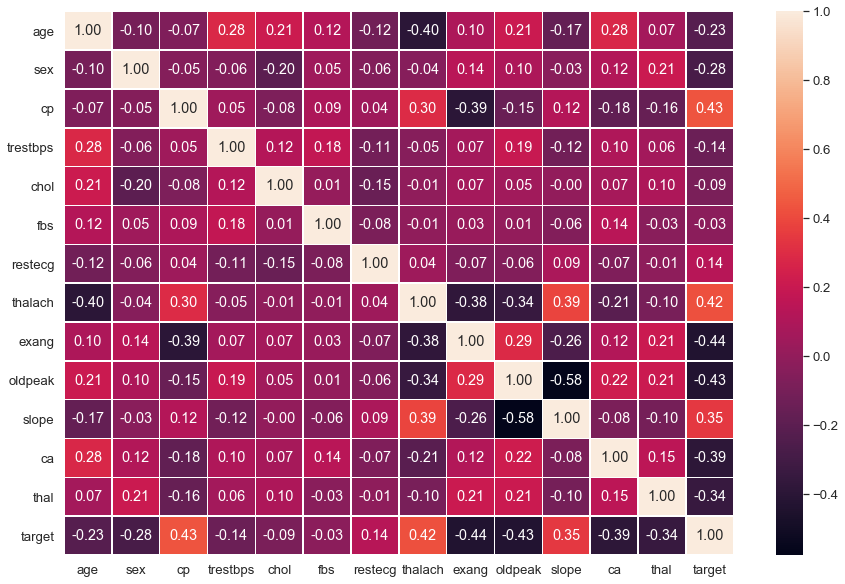

In [16]:
corr_matrix = heart_disease.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                annot = True,
                lw = 0.5,
                fmt = '.2f');

In [17]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

In [53]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [54]:
models = {
    'LinearSVC': LinearSVC(max_iter = 10000),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(max_iter = 10000),
    'XGBClassifier': XGBClassifier()
}

model_score = {}
model_cv_score = {}

In [55]:
np.random.seed(42)
for model_name, model in models.items():
    
    model.fit(X_train, y_train)
    model_score[model_name] = model.score(X_test, y_test)
    
    # CV Score
    model_cv_score[model_name] = np.mean(cross_val_score(model, X, y))

/Users/kyleortega/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/kyleortega/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/kyleortega/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/kyleortega/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/kyleortega/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblin

In [56]:
model_score

{'LinearSVC': 0.5081967213114754,
 'KNeighborsClassifier': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918,
 'LogisticRegression': 0.8852459016393442,
 'XGBClassifier': 0.8524590163934426}

In [57]:
model_cv_score

{'LinearSVC': 0.7294535519125682,
 'KNeighborsClassifier': 0.643879781420765,
 'RandomForestClassifier': 0.8116939890710382,
 'LogisticRegression': 0.8282513661202187,
 'XGBClassifier': 0.8050819672131148}

### Time for some HyperParameter Tuning

In [58]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

**Starting with RandomizedSearch**

In [59]:
rf_rs = {'n_estimators': np.arange(10, 1000, 50),
          'max_depth': [None, 3, 5, 10],
          'min_samples_split': np.arange(2, 20, 2),
          'min_samples_leaf': np.arange(1,20,2)}

log_rs = {'penalty': ['l1', 'l2'],
          'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
          'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
          'solver': ['liblinear', 'saga']}

xgb_rs = {'learning_rate': [0.05, 0.10, 0.30, 0.6, 0.8],
           'max_depth': [3,4,6,8,12,15],
           'gamma': [0.1,0.3,0.5,0.8],
           'colsample_bytree': [0.3,0.5,0.7]}

In [60]:
np.random.seed(42)
def random_search(dictionary, model):
    rs_model = RandomizedSearchCV(estimator = model,
                                 param_distributions = dictionary,
                                 cv = 8,
                                 n_iter = 10)
    return rs_model

In [61]:
rf_random = random_search(rf_rs, RandomForestClassifier())
rf_random.fit(X_train, y_train)
rf_random.score(X_test, y_test)

0.8688524590163934

In [62]:
clf = RandomForestClassifier(n_estimators = 310, min_samples_split = 2, min_samples_leaf = 19, max_depth = 5)
np.mean(cross_val_score(clf, X, y))

0.831584699453552

In [63]:
lr_random = random_search(log_rs, LogisticRegression(max_iter = 10000))
lr_random.fit(X_train, y_train)
lr_random.score(X_test, y_test)

0.8852459016393442

In [64]:
xgb_random = random_search(xgb_rs, XGBClassifier())
xgb_random.fit(X_train, y_train)
xgb_random.score(X_test, y_test)

0.8524590163934426

In [65]:
rf_random.best_params_

{'n_estimators': 310,
 'min_samples_split': 2,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [66]:
lr_random.best_params_

{'solver': 'liblinear',
 'penalty': 'l1',
 'class_weight': {1: 0.6, 0: 0.4},
 'C': 1000}

In [67]:
xgb_random.best_params_

{'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.5}

#### Let's see if we can get better accuracy with `GridSearchCV`

In [68]:
rf_gs = {'n_estimators': [300,310,350],
          'max_depth': [None, 3, 5, 6],
          'min_samples_split': [2,4,6],
          'min_samples_leaf': [15,19,21]}

xgb_gs = {#'learning_rate': [0.03, 0.05, 0.08],
           'max_depth': [9,12,15],
           'colsample_bytree': [0.3,0.5,0.7]}

In [69]:
np.random.seed(42)
def grid_search(dictionary, model):
    gs_model = GridSearchCV(estimator = model,
                           param_grid = dictionary,
                           cv = 8)
    return gs_model

In [70]:
rf_grid = grid_search(rf_gs, RandomForestClassifier())
rf_grid.fit(X_train, y_train)
rf_grid.score(X_test, y_test)

0.8688524590163934

In [71]:
xgb_grid = grid_search(xgb_gs, XGBClassifier())
xgb_grid.fit(X_train, y_train)
xgb_grid.score(X_test, y_test)

0.8688524590163934

In [72]:
rf_grid.best_params_

{'max_depth': 5,
 'min_samples_leaf': 19,
 'min_samples_split': 6,
 'n_estimators': 310}

In [73]:
xgb_grid.best_params_

{'colsample_bytree': 0.3, 'max_depth': 12}

#### Let's Test out the Given Paramters

In [74]:
clf = RandomForestClassifier(max_depth = 3, min_samples_leaf = 19, min_samples_split = 6, 
                             n_estimators = 350, random_state = 20)
np.mean(cross_val_score(clf,X,y))

0.8481420765027323

In [75]:
xgb = XGBClassifier(colsample_bytree = 0.3, max_depth = 12)
np.mean(cross_val_score(xgb,X,y))           

0.811639344262295

In [76]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

#### RandomForestClassifier has the best overall accuracy

In [77]:
clf = RandomForestClassifier(n_estimators = 350, max_depth = 3, min_samples_leaf = 19, 
                             min_samples_split = 6, random_state = 40)
np.mean(cross_val_score(clf, X, y))

0.8447540983606558

In [78]:
clf = XGBClassifier(colsample_bytree = 0.3, max_depth = 12)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8688524590163934

### Further Evaluations of our Model

In [79]:
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)

In [80]:
print(y_preds)
print()
print(np.array(y_test))

[0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0]

[0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0]


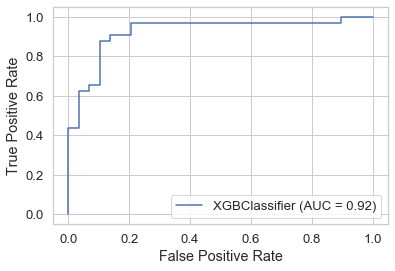

In [81]:
plot_roc_curve(clf, X_test, y_test);

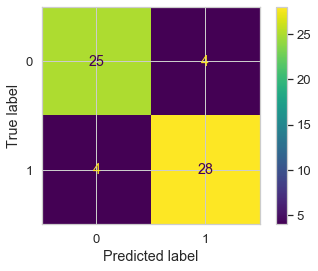

In [82]:
plot_confusion_matrix(clf, X_test, y_test);

In [83]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### Feature Importance

In [84]:
feature_dict = dict(zip(X.columns, clf.feature_importances_))
feature_dict

{'age': 0.03476659,
 'sex': 0.09745927,
 'cp': 0.12073889,
 'trestbps': 0.015840404,
 'chol': 0.027919816,
 'fbs': 0.013896389,
 'restecg': 0.02039716,
 'thalach': 0.028628029,
 'exang': 0.134391,
 'oldpeak': 0.06246437,
 'slope': 0.062484466,
 'ca': 0.19914412,
 'thal': 0.18186948}

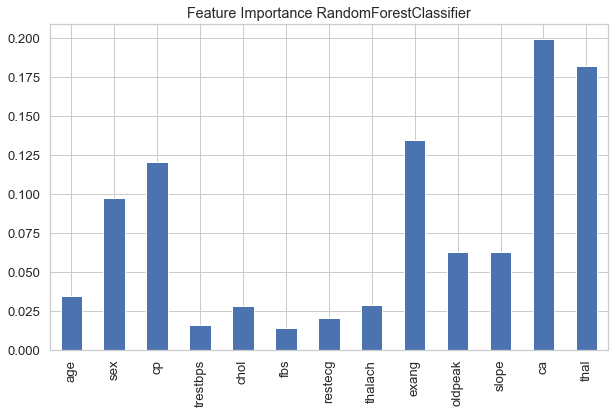

In [85]:
importance_df = pd.DataFrame(feature_dict, index = [0])
importance_df.T.plot.bar(title = 'Feature Importance RandomForestClassifier', figsize = (10,6), legend = False);